# Comment faire des graphiques pour les rapports?

Le but de ce notebook c'est principalement de comprendre que si t'essayes de trouver une manière de faire un truc en python, il y a probablement déjà une fonction et une librarie qui fait exactement ce que tu veux faire. La documentation est ta meilleure amie.

Si tu es sur VS Code, tu peux collapser chaque point en cliquant sur la flèche à côté de chaque titre de section. C'est beaucoup plus facile de retrouver un truc plus tard comme ça.

_**Attention! — Pour que le tuto marche bien, il faut mettre le fichier avec les données ("data.csv") dans le même dossier dans ton ordi que le fichier python du tuto ("python_tutorial.ipynb").**_

Documentation links :
- matplotlib documentation: https://matplotlib.org/stable/users/index.html
- matplotlib cheatsheets (very good resource): https://matplotlib.org/cheatsheets/cheatsheets.pdf
- numpy documentation: https://numpy.org/doc/2.0/
- scipy documentation: https://docs.scipy.org/doc/scipy/
- uncertainties documentation: https://pythonhosted.org/uncertainties/user_guide.html
- Pour installer Latex: https://www.latex-project.org/get/ OR https://www.tug.org/texlive/

## 1. Importer les libraries nécessaires

Pour tout installer comme testé: `pip install numpy==2.0.1 matplotlib==3.9.2 scipy==1.14.1 uncertainties==3.2.2 ipykernel`

À mettre au début de chaque fichier python :

In [1]:
import numpy as np  # pour manipuler des np.array() (vecteurs)
import matplotlib.pyplot as plt  # pour pouvoir faire des graphiques
import scipy as sc  # pour des fits arbitraires

## 2. Définir des paramètres

On peut modifier au début du programme les paramètres généraux que matplotlib va utiliser pour tous les graphiques en output. C'est utile de les définir une fois pour toutes. 

À mettre au début de chaque fichier python :

In [52]:
plt.rcParams.update(
    {
        "text.usetex" : True, # utiliser police latex, mais il faut installer latex pour que la commande marche, sinon tout le code crash
                              # dcp si tu l'as pas enlève les trois premières lignes des configs ici pls
        "font.family": "serif", # latex aussi
        "text.latex.preamble": "\n".join([
            r"\setlength{\parindent}{0pt}"  # ne pas indenter les paragraphes latex
        ]),

        "font.size": 12,  # taille par défaut de la police, pour tout
        "axes.labelsize": 12,  # redefinit la taille pour la legende des axes
        "legend.fontsize": 12,  # pareil pour la legende, ajuster en function de la place et du contenu
        "xtick.labelsize": 12,  # taille numerotation des axes
        "ytick.labelsize": 12,  # pareil
        "figure.figsize": (3.9, 2.925),  # taille de la figure en pouces, correspond a 1/2 page horizontalement et une certaine valeur verticalement

        'lines.markersize': 12,  # des plus gros markeurs pour les scatterplot (il faut les mettre plus grands que tu penses)
        'errorbar.capsize': 3,  # taille des bords des barres d'erreurs, evite de se repeter a chaque fois

        "savefig.bbox" : "tight", # quand tu sauvegardes les graphes à la fin ça assure que tu coupes pas des parties de l'image
        "legend.framealpha" : 1, # légende opaque sur les graphes
        "axes.grid" : 1  # met des quadrillages sur les graphes
    } 
)

## 3. Load the data

Ouvrir le fichier .csv :

In [3]:
delimiter = ','
n = 1

# np.loadtxt() – met les données de "data.csv" dans une liste "data"
# delimiter – définit ce qui sépare chaque élément dans le fichier de données, dans notre cas une virgule
# skiprows – définit le nombre de rangées à sauter au début du fichier texte
data = np.loadtxt("data.csv", delimiter=delimiter, skiprows=n) 

Définir les grandeurs à analyser et plotter :

Lien utile : [manipulations de numpy arrays](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html)

In [4]:
# data[:,0] prend tous les élements dans la première colonne du array data qui a 2 dimensions
x = data[:,0]
y = data[:,1]

Voir / verifier le contenu :

In [5]:
# tout ce qui est en fin de cellule est affiché automatiquement
data, x, y

(array([[ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 4.,  4.],
        [ 5.,  5.],
        [ 6., 11.],
        [ 7., 15.],
        [ 8., 16.],
        [ 9., 17.]]),
 array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 1.,  2.,  3.,  4.,  5., 11., 15., 16., 17.]))

## 4. Graph the data

Il y a des fonctions différentes pour créer des plots. La plus commune et la plus génerale est `plt.plot`. Pour un nuage de points `plt.scatter`.

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

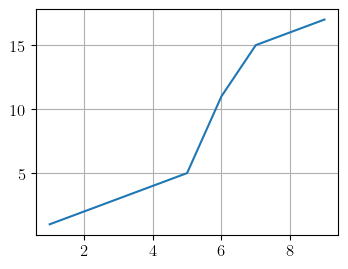

In [6]:
# graphique avec les configurations de défaut + les paramètres qu'on a définit au début
plt.plot(x, y) 

Regarder la documentation `plt.plot` et / ou les cheatsheets matplotlib pour les modifications de couleur etc. parce que the possibilities are endless. Tu peux faire tout ce que tu veux. Par exemple, changer la taille des points et la couleur :

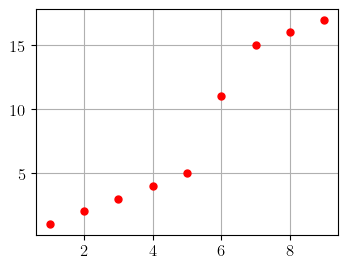

In [7]:
ms = 10
# ms stands for markersize
# 'r.' – r means red, . means points
plt.plot(x, y, 'r.', ms=ms) 

Puis, on peut afficher une légende. 

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

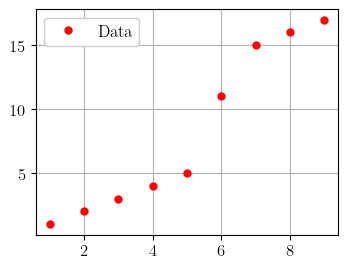

In [8]:
ms = 10
plt.plot(x, y, 'r.', ms=ms, label='Data')
plt.legend()

**J'AI OUBLIÉ DE LABEL MES AXES => IVA VA ME TUER**

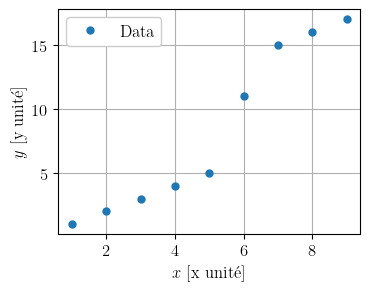

In [9]:
ms = 10 
plt.plot(x, y, '.', ms=ms, label='Data')
plt.legend()
# règles de formattage: grandeur en italiques, mais son unité non
# tout ce qui est entre `$ ... $` va etre formatté en latex.
# ATTENTION: les erreurs de latex sont souvent très obscures a decoder (voir prochaine cellule)
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

# plt.savefig – sauvegarde le graphe en pdf sous le nom "image.pdf"
# C'est joli les pdfs parce que c'est jamais pixelé
# Le format .png est utile pour des figures avec BEAUCOUP de donneés
plt.savefig('image.pdf')

Quelques conseils pour le latex dans les plots / sur python :

In [10]:
# Pour les strings avec du latex, le plus facile est de mettre un `r` au debut (les \ posent des problèmes autrement)
r"$\LaTeX$ is fun (no)"

# Si on veut formatter automatiquement, il faut faire attention aux {}:
# pour mettre un "{", il faut tapper "{{"
a = 1
b = 3
# Ces 3 strings sont equivalents
f"$\\frac{{{a}}}{{{b}}}$" == r"$\frac{1}{3}$" == r"$\frac{{{}}}{{{}}}$".format(a, b)

True

In [11]:
# Erreur obscure a savoir reconnaitre
plt.xlabel(r"$\invalide$ [u.a.]")
# Error in callback <function _draw_all_if_interactive at 0x7f4f1571f9c0> (for post_execute), with arguments args (),kwargs {}:

Text(0.5, 0, '$\\invalide$ [u.a.]')

Error in callback <function _draw_all_if_interactive at 0x7f3dd9bf4ae0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'$\\\\invalide$ [u.a.]'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp_w58ctq6 9b84b6da98ef8b0edae017b31e077db1.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Fedora 39) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./9b84b6da98ef8b0edae017b31e077db1.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 9b84b6da98ef8b0edae017b31e077db1.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<recently read> \invalide 
                          
l.29 {\rmfamily $\invalide
                          $ [u.a.]}%
No pages of output.
Transcript written on tmp_w58ctq6/9b84b6da98ef8b0edae017b31e077db1.log.




RuntimeError: latex was not able to process the following string:
b'$\\\\invalide$ [u.a.]'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpypfejub4 9b84b6da98ef8b0edae017b31e077db1.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023/Fedora 39) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./9b84b6da98ef8b0edae017b31e077db1.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 9b84b6da98ef8b0edae017b31e077db1.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Undefined control sequence.
<recently read> \invalide 
                          
l.29 {\rmfamily $\invalide
                          $ [u.a.]}%
No pages of output.
Transcript written on tmpypfejub4/9b84b6da98ef8b0edae017b31e077db1.log.




<Figure size 390x292.5 with 1 Axes>

## 5. Analyse des données

### 5.1. Faire un fit

La méthode la plus facile et commune est np.polyfit().

Documentation: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [12]:
degree_of_fit = 1 # 1 pour un fit linéaire, 2 pour quadratique etc.
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)

# polynome_output contient [a,b] t.q. y = a*x+b pour data données en argument à la fonction
a = polynome_output[0]
b = polynome_output[1]

Les erreurs sur les coefficients sont dans la racine des éléments dans la diagonale

In [13]:
# soit
da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])

# ou encore plus court:
da, db = np.sqrt(np.diag(matrice_covariante))

Pour plot le fit avec les données :

Text(0, 0.5, '$y$ [y unité]')

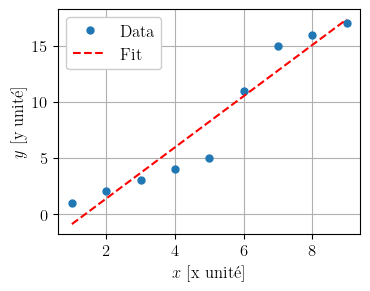

In [14]:
ms = 10
plt.plot(x, y, '.', ms=ms, label='Data')

# plot le fit
# np.linspace() – crée un array de 10 éléments distribués uniformément dans l'intervalle [x[0], x[-1]]
truc = np.linspace(x[0], x[-1], 10) 
plt.plot(truc, a*truc+b, 'r--', label='Fit') 

# il faut généralement écrire l'équation du fit en légende
# en général je plotte le fit en pointillé et dans une couleur difƒérente – Lucia
# je préfere perso les mettre en soit en noir ('k--'), soit la couleur des points fittés s'il y plusieurs fits – Tom

plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

Les assistants ont des opinions différentes sur les conventions d'écrire l'équation d'un fit. Le plus safe c'est de l'écrire avec x et y :

Text(0, 0.5, '$y$ [y unité]')

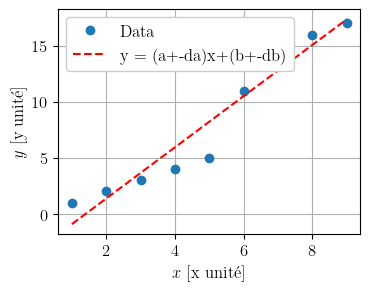

In [15]:
# sans latex
plt.plot(x, y, '.', label='Data')

truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label='y = (a+-da)x+(b+-db)') 

# ATTENTION: LA LEGENDE OVERLAP ICI PAS BIEN POUR RAPPORTS
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

Text(0, 0.5, '$y$ [y unité]')

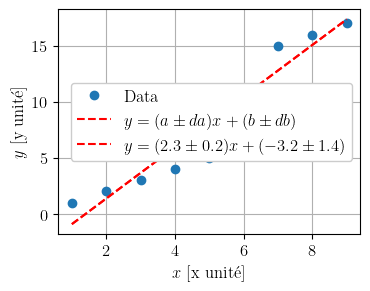

In [16]:
# avec latex
plt.plot(x, y, '.', label='Data')
truc = np.linspace(x[0], x[-1], 10)

# soit mettre directement les valeurs dans la légende
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a \pm da)x+(b \pm db)$')
# soit laisser python le faire
plt.plot(truc, a*truc+b, 'r--', label=r'$y = ({:.1f} \pm {:.1f})x+({:.1f} \pm {:.1f})$'.format(a, da, b, db))

# ATTENTION: LA LEGENDE OVERLAP ICI PAS BIEN POUR RAPPORTS
# voir partie 6.1.6 pour bouger la légende
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

### 5.2. Plusieurs fits au même temps

Text(0, 0.5, '$y$ [y unité]')

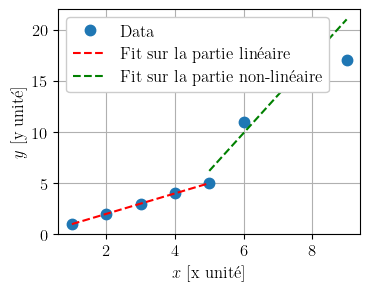

In [17]:
degree_of_fit = 1

# partie linéaire
polynome_output, matrice_covariante = np.polyfit(x[0:4], y[0:4], deg=degree_of_fit, cov=True)
# partie non linéaire dcp un peu con de faire un fit linéaire mais bon
polynome_output2, matrice_covariante2 = np.polyfit(x[4:-1], y[4:-1], deg=degree_of_fit, cov=True)

a, b = polynome_output
a2, b2 = polynome_output2

da, db = np.sqrt(np.diag(matrice_covariante))
da2, db2 = np.sqrt(np.diag(matrice_covariante2))

truc = np.linspace(x[0], x[4], 10)
truc2 = np.linspace(x[4], x[-1], 10)

plt.plot(x, y, '.', ms=15, label="Data")
plt.plot(truc, a*truc+b, 'r--', label='Fit sur la partie linéaire')
plt.plot(truc2, a2*truc2+b2, 'g--', label='Fit sur la partie non-linéaire')

# ATTENTION: LA LEGENDE OVERLAP ICI PAS BIEN POUR RAPPORTS
# Labo c'est 4 heures par semaine de tps et 40 heures par jour d'essayer de faire des jolis graphiques – Lucia
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

### 5.3. Faire un fit arbitraire

De temps en temps il faut faire un fit d'une fonction spéciale sur tes résultats, genre des $A e^{-\lambda t}\cos(\omega t + \varphi)$

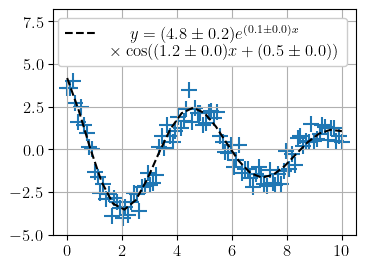

In [18]:
fake_data_x = np.linspace(0, 10, 100)
fake_data_y = 5 * np.exp(-0.15 * fake_data_x) * np.cos(1.23 * fake_data_x + np.pi/6) + (np.random.random(fake_data_x.shape) - 0.5) * 2
plt.scatter(fake_data_x, fake_data_y, marker='+')

# fonction à fitter
# !! lambda est un mot reservé !!
def func_to_fit(t, A, lmbda, omega, phi):
    return A * np.exp(-lmbda * t) * np.cos(omega * t + phi)

# faire le fit
coefs, cov = sc.optimize.curve_fit(func_to_fit, fake_data_x, fake_data_y)
A, lmbda, omega, phi = coefs
dA, dLmbda, dOmega, dPhi = np.sqrt(np.diag(cov))
fitx = np.linspace(0, 10, 25)
# *coefs met tous les coefs au bon endroit dans l'appel, equivalent a faire `A, lmbda, omega, phi`
fity = func_to_fit(fitx, *coefs) 

# bien mettre la fonction dans la legende / le latex. pour les retours a la ligne: "\\".
# oui c'est chiant a tapper. non il n'y a pas vraiment de meilleure option – Tom
plt.plot(
    fitx, fity, 'k--',
    label=r"$y = ({:.1f} \pm {:.1f}) e^{{({:.1f} \pm {:.1f}) x}} \\ \times \cos(({:.1f} \pm {:.1f}) x + ({:.1f} \pm {:.1f}))$".format(A, dA, lmbda, dLmbda, omega, dOmega, phi, dPhi)
)

# pour eviter que la legende overlap, il faut bidouiller encore une fois
plt.ylim(-5, 8.2)
plt.legend()

### 5.4. Barres d'erreur (!!!! Important !!!!)

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

Si t'as une erreur connue tu dois la mettre. Les seules exceptions sont :
1. si elle est pas visible ou 
2. si elle est constante. 

C'est cool de mettre les barres si elles sont visibles, juste parce que it shows that you care. – Lucia

Sinon, les phrases typiques dans les rapports : *"Les erreurs sur les données étaient constantes à {valeur}. Donc, elles ne figurent pas sur le graphique."* / *"Les barres d'erreur sur les données ne sont pas visibles. Donc, elles ne figurent pas sur les graphiques."* / *"Par souci de clarté, les barres d'erreurs sont omises sur ce graphique."*

Text(0, 0.5, '$y$ [y unité]')

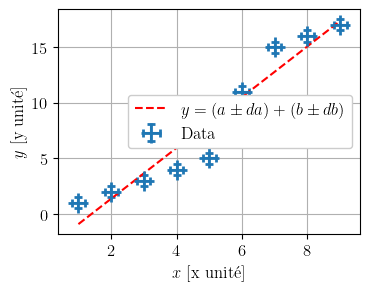

In [19]:
# fit
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)
a, b = polynome_output
da, db = np.sqrt(np.diag(matrice_covariante))

# erreurs
erreur_x = 0.2 # par exemple
erreur_y = 0.5
# défini un array de la même taille que x avec des 1s dans chaque position, 
# et après on multiplie par la valeur de l'erreur
dx = erreur_x*np.ones_like(x)
dy = erreur_y*np.ones_like(y)

# plot 
# capsize controle la taille des petites barres au bouts ("caps")
# ordre d'arguments un peu fucked mais oui c'est plt.errorbar(x, y, erreur de y, erreur de x, ...)
# souvent on s'en tape de l'erreur en x par contre, tu peux juste enlever "dx" dans ce cas
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data') 
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

Pour les erreurs qui varient, mais c'est de la stat ça devrait être logique :

Text(0, 0.5, '$y$ [y unité]')

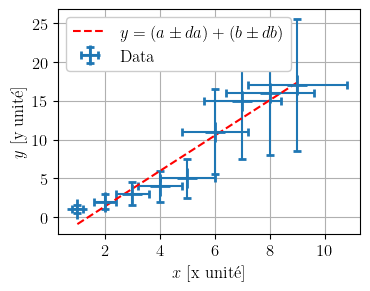

In [20]:
# fit
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)
a, b = polynome_output
da, db = np.sqrt(np.diag(matrice_covariante))

# erreurs
erreur_relative_x = 0.1 # par exemple
erreur_relative_y = 0.1
dx = erreur_x*np.ones_like(x)*x
dy = erreur_y*np.ones_like(y)*y

# plot
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')


Ces barres d'erreurs sont un peu extrèmes, vérifier avec d'anciens rapports / demander à l'assistant

## 6. Fonctions intéressantes

### 6.1. Graphiques

#### 6.1.1. Limites des axes

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

Pour controller où tu veux couper le graphique `plt.xlim()`, `plt.ylim()`. Si tu veux que montrer jusqu'à 5m dans l'échelle de l'axe x tu fais:   plt.xlim(0,5)

(0.0, 8.0)

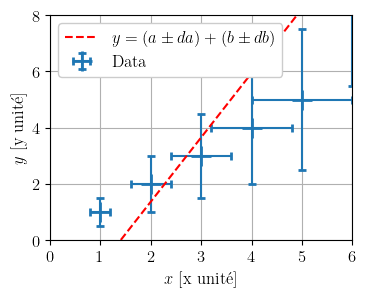

In [21]:
# exemple
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

plt.xlim(0, 6)
plt.ylim(0, 8)

#### 6.1.2. Tracer des droites facilement

Documentation axhline (horizontal): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html

Documentation axvline (vertical): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html

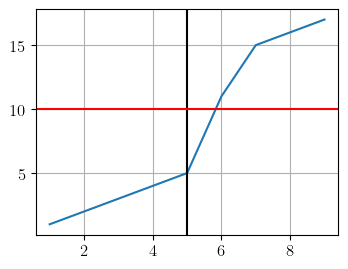

In [22]:
plt.plot(x, y)
plt.axvline(5, color='k')
plt.axhline(10, color='r')

#### 6.1.3. Scientific format for axis


Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html

`plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=False)` --> puts y axis ticks in scientific format

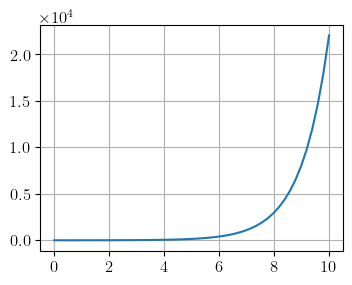

In [23]:
data_x = np.linspace(0, 10)
data_y = np.exp(data_x)
plt.plot(data_x, data_y)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=False)

#### 6.1.4. Echelle logarithmique

Documentation: https://matplotlib.org/stable/users/explain/axes/axes_scales.html

de temps en temps il faut montrer une relation exponentielle et non linéaire pour tes datas, alors pour faire un plot avec echelle logarithmique.

`plt.loglog(x, y, ...)` ou `plt.semilogx(x, y, ...)` (pour l'axe x en log) ou `plt.semilogy(x, y, ...)` (tu comprends) ou `plt.yscale('log')`

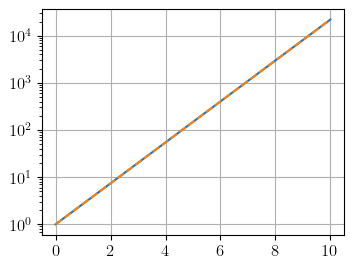

In [24]:
plt.plot(data_x, data_y)
plt.yscale('log')
# ou, memes arguments que plt.plot
plt.semilogy(data_x, data_y, '--')

#### 6.1.5. Comment trouver un point graphiquement? petit tuto


En mettant une couleur différente pour une partie limité des points, on peut trouver l'indice dans l'array d'un certain point.

C'est particulièrement utile si t'essayes de trouver l'indice d'un point pour une certaine valeur et t'as des centaines de points.

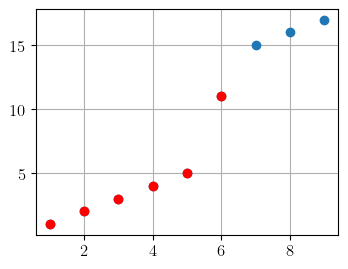

In [25]:
ms = 12
# change ça à 4 ou 9 par exemple, pour voir ce que je veux dire
n = 6
plt.plot(x, y, '.', ms=ms)
plt.plot(x[:n], y[:n], 'r.', ms=ms) 

#### 6.1.6. Placer et déplacer la légende

Pour le placement de la légende, faire attention a ne pas recouvrir les données. Le meilleur est d'utiliser le cheatsheet pour toutes les infos.

Techniques possibles:
1. Séparer le texte sur plusieurs lignes (retour à la ligne `"\n"`, dans LaTeX `"\\"`)
2. Changer le `ylim`
3. Mettre la légende en dehors de la figure, utiliser le cheatsheet pour ca (dépend de l'assistant)
4. Agrandir la figure dans le rapport et changer le `figsize` avec `plt.figure(figsize=(6, 4))` au début de la cellule
5. Réduire la taille des marqueurs avec les arguments `handlelength`, `handletextpad`, `labelspacing`, `borderpad`
6. Mettre en plusieurs colonnes avec l'argument `ncols`

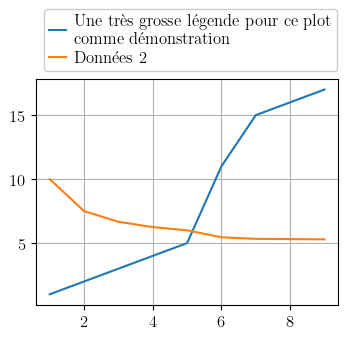

In [26]:
# exemple 1, 3 et 5
plt.plot(x, y, label="Une très grosse légende pour ce plot \n comme démonstration")
plt.plot(x, 5+1/y*5, label="Données 2")
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 1.0), handlelength=1, handletextpad=0.5, labelspacing=0.3, borderpad=0.3)

## 7. Le calcul d'incertitudes, c'est chiant


Alors laissons python le faire!

Il y a une librairie qui s'appelle uncertainties (documentation: https://uncertainties.readthedocs.io/en/latest/) qui est vraiment pas mal (faut apprendre a s'en servir et faire attention avec certaines fonctions mais autrement c'est pas mal)

(perso ça m'a fait trop chier d'essayer d'apprendre à l'utiliser pendant le semestre quand j'avais déjà mes propres habitudes. dcp il faut juste choisir soit de l'utiliser et faire un peu d'effort pour qu'après ça soit très très facile. soit give up and suffer comme moi – Lucia)

In [27]:
import uncertainties as uc
import uncertainties.unumpy as unp

In [28]:
# Une valeur avec incertitude
a = uc.ufloat(42, 0.69)
a

42.0+/-0.69

In [29]:
# récuperer sa valeur (nominal_value) et son incertitude (standard_deviation)
a.n, a.s

(42.0, 0.69)

Toutes les operations fonctionnent toujours

In [30]:
print(a + 27)
b = uc.ufloat(32, 2.6)
print(a+b)
print(a/b)
# pour toutes les fonctions maths, utiliser unumpy.(...)
print(unp.cos(a))
print(unp.arctanh(b / 100))

69.0+/-0.7
74.0+/-2.7
1.31+/-0.11
-0.4+/-0.6
0.332+/-0.029


Formatter dans un string: https://uncertainties.readthedocs.io/en/latest/formatting.html

In [31]:
# 2 chiffres significatif
print(f"{a:.2u}")

# 1 chiffre significatif (1u), notation scientifique (e)
print(f"{a:.1ue}")

# avec formattage latex (pratique pour les legendes dans matplotlib!)
print(f"{a:.1ueL}")

# avec un formattage "beau"
print(f"{a:.1ueP}")

# forcer avec des parentheses autour (comme Iva le veut toujours!)
print(f"{a:.2up}")

42.00+/-0.69
(4.20+/-0.07)e+01
\left(4.20 \pm 0.07\right) \times 10^{1}
(4.20±0.07)×10¹
(42.00+/-0.69)


Travailler avec des array de `ufloat`

In [32]:
# un array de valeur / erreur
a = unp.uarray((0, 1, 2, 3, 4), (0.1, 0.2, 0.258, 0.5, 0.8))
a

array([0.0+/-0.1, 1.0+/-0.2, 2.0+/-0.258, 3.0+/-0.5, 4.0+/-0.8],
      dtype=object)

In [33]:
print(a + 42)
b = np.copy(a) + uc.ufloat(42, 5.6) - 5
print(a + b)
print(unp.cos(a))

[42.0+/-0.1 43.0+/-0.2 44.0+/-0.258 45.0+/-0.5 46.0+/-0.8]
[37.0+/-5.60357029044876 39.0+/-5.61426753904728 41.0+/-5.623722610513431
 43.0+/-5.688585061331157 45.0+/-5.824087911424414]
[1.0+/-0 0.5403023058681398+/-0.16829419696157932
 -0.4161468365471424+/-0.23459873612102589
 -0.9899924966004454+/-0.0705600040299336
 -0.6536436208636119+/-0.6054419962463427]


Pour utiliser ces valeurs dans matplotlib ou scipy par exemple, il faut extraire les valeurs et incertitudes. C'est la partie la moins pratique, mais c'est le prix a payer

<ErrorbarContainer object of 3 artists>

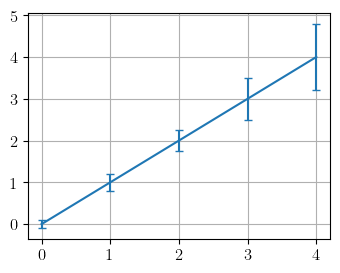

In [34]:
valeurs_a = unp.nominal_values(a)
incertitudes_a = unp.std_devs(a)
plt.errorbar(range(5), valeurs_a, incertitudes_a)

Demonstration d'utilisation pour la partie 5.3.

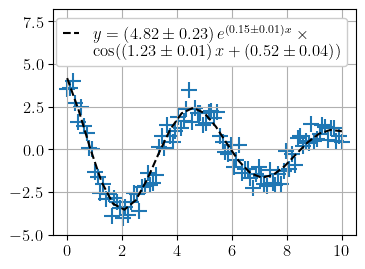

In [55]:
# On réutilse ce qui a deja été fait avant
plt.scatter(fake_data_x, fake_data_y, marker='+')

coefs, cov = sc.optimize.curve_fit(func_to_fit, fake_data_x, fake_data_y)
coefs_error = unp.uarray(coefs, np.sqrt(np.diag(cov)))
fitx = np.linspace(0, 10, 25)
fity = func_to_fit(fitx, *coefs) 

# C'est plus court quand même
plt.plot(
    fitx, fity, 'k--',
    label=r"$y = {:.2upL} e^{{{:.1upL} x}} \times \\ \cos({:.1upL} x + {:.1upL})$".format(*coefs_error)
)
plt.ylim(-5, 8.2)
plt.legend(handlelength=1)

---
Made with ❤️ by
- [@Lucia](https://github.com/pleasantenough): quasiment tout
- [@Tom](https://github.com/TomVdt): revisions, exemples concrets, uncertainties